# Diabetes metrics in R
Some of the metrics required by the international consensus are not currently available in the diametrics package. Therefore I used the R package iglu to calculate these metrics 

## Import packages and load data

In [72]:
library(iglu)
library(dplyr)
library(tidyverse)

In [73]:
df <- read.csv('interp_dataset.csv')

## Clean data

In [64]:
# Create a separate df for 15 min readings and rename columns
df_cut <- df[!is.na(df$cut_glc),]
df_cut <- df_cut %>% rename(gl = cut_glc, id=ID)

In [74]:
# Create the 5 min readings and rename columns
df <-df[!is.na(df$gl),]
df <- df %>% rename(gl = glc, id=ID)

## Calculate metrics

In [66]:
# Calculate AUC for 5 and 15 mins
glc_auc = auc(df)
cut_glc_auc = auc(df_cut)

In [67]:
# Convert glucose to mg/dL to calculate other metrics
df$gl = df$gl/0.0555
df_cut$gl = df_cut$gl/0.0555

In [68]:
# Calculate LBGI and HBGI for 5 and 15 mins
glc_lbgi = lbgi(df)
cut_glc_lbgi = lbgi(df_cut)
glc_hbgi = hbgi(df)
cut_glc_hbgi = hbgi(df_cut)

In [69]:
# Merge results
relevent_results = cbind(glc_auc, cut_glc_auc$hourly_auc, glc_lbgi$LBGI, cut_glc_lbgi$LBGI, glc_hbgi$HBGI, 
      cut_glc_hbgi$HBGI)

In [71]:
write.csv(relevent_results, 'r_metrics.csv')

## Statistical summary of results

In [70]:
summary(relevent_results)

             id       hourly_auc     cut_glc_auc$hourly_auc glc_lbgi$LBGI   
 1001_baseline: 1   Min.   : 6.414   Min.   : 6.423         Min.   :0.0000  
 1003_6months : 1   1st Qu.: 8.816   1st Qu.: 8.808         1st Qu.:0.2336  
 1003_baseline: 1   Median :10.165   Median :10.172         Median :0.6454  
 1004_6months : 1   Mean   :10.270   Mean   :10.274         Mean   :0.9683  
 1004_baseline: 1   3rd Qu.:11.561   3rd Qu.:11.554         3rd Qu.:1.2700  
 1005_6months : 1   Max.   :17.401   Max.   :17.457         Max.   :6.3992  
 (Other)      :93                                                           
 cut_glc_lbgi$LBGI glc_hbgi$HBGI    cut_glc_hbgi$HBGI
 Min.   :0.0000    Min.   : 1.357   Min.   : 1.355   
 1st Qu.:0.2406    1st Qu.: 7.120   1st Qu.: 7.131   
 Median :0.6474    Median :10.539   Median :10.522   
 Mean   :0.9650    Mean   :11.955   Mean   :11.959   
 3rd Qu.:1.2725    3rd Qu.:15.695   3rd Qu.:15.697   
 Max.   :6.3823    Max.   :37.994   Max.   :37.918   
      

## Lasagna plot for each ID 

Warning message in CGMS2DayByDay(., tz = tz, dt0 = dt0, inter_gap = inter_gap):
"During time conversion, 4 values were set to NA. Check the correct time zone specification."Warning message in CGMS2DayByDay(., tz = tz, dt0 = dt0, inter_gap = inter_gap):
"During time conversion, 4 values were set to NA. Check the correct time zone specification."Warning message in CGMS2DayByDay(., tz = tz, dt0 = dt0, inter_gap = inter_gap):
"During time conversion, 4 values were set to NA. Check the correct time zone specification."Warning message in CGMS2DayByDay(., tz = tz, dt0 = dt0, inter_gap = inter_gap):
"During time conversion, 4 values were set to NA. Check the correct time zone specification."Warning message in CGMS2DayByDay(., tz = tz, dt0 = dt0, inter_gap = inter_gap):
"During time conversion, 4 values were set to NA. Check the correct time zone specification."

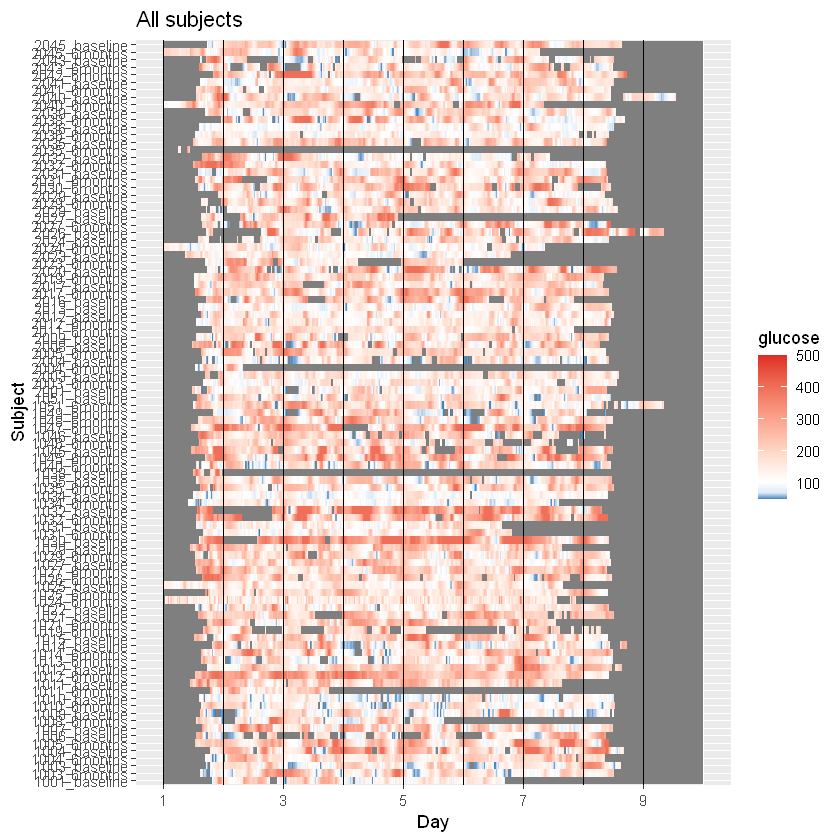

In [23]:
plot_lasagna(df)